In [135]:
from dotenv import load_dotenv
import os
import pandas as pd
import numpy as np
from fredapi import Fred
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import fredpy as fp

In [136]:
# .env에서 api_key 가져오기 
load_dotenv()

FRED_API_KEY = os.getenv('FRED_API_KEY')


In [3]:
# fredapi 
fred = Fred(api_key = FRED_API_KEY)

# 실업률
unemployment = fred.get_series_all_releases('UNRATE')

# PPI
ppi = fred.get_series_all_releases('PPIACO')
ppi.tail()

,realtime_start,date,value
1710,2024-08-13 00:00:00,2024-06-01 00:00:00,255.779
1711,2024-09-12 00:00:00,2024-06-01 00:00:00,256.015
1712,2024-08-13 00:00:00,2024-07-01 00:00:00,257.723
1713,2024-09-12 00:00:00,2024-07-01 00:00:00,257.485
1714,2024-09-12 00:00:00,2024-08-01 00:00:00,255.613


In [152]:
# fredpy
plt.style.use('classic')
plt.rcParams.update({'figure.facecolor': 'white'})

fp.api_key = FRED_API_KEY

enddate=(datetime.now() + timedelta(days=-1)).strftime('%Y-%m-%d')


## 예시 
CPI 데이터 가져와서 시각화

In [5]:
# sample : CPI

cpi= fp.series('CPIAUCSL',enddate)
corecpi = fp.series('CPILFESL',enddate)
cpi.data
cpiyoy=cpi.apc().data
cpiyoy
cpimom=cpi.data.pct_change()*100
cpimom
corecpiyoy=corecpi.apc().data
corecpimom=corecpi.data.pct_change()*100

import plotly.express as px

fig=px.bar(x=cpiyoy.index, y=cpiyoy.values, color=cpiyoy.values, 
          title='CPI YOY 장기데이터', height=500)
fig.update_traces(textposition='outside')
fig.update_layout(
    uniformtext_minsize=8, uniformtext_mode='hide',
    title={
        'y':0.85,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show()

In [6]:
dfyoy = pd.DataFrame({'CPI':cpiyoy.values, 'coreCPI':corecpiyoy},index=cpiyoy.index)
dfyoy

,CPI,coreCPI
date,,
1948-01-01,10.242086,NaN
1948-02-01,9.481961,NaN
1948-03-01,6.818182,NaN
1948-04-01,8.272727,NaN
1948-05-01,9.384966,NaN
...,...,...
2024-04-01,3.357731,3.615527
2024-05-01,3.250210,3.411063
2024-06-01,2.975629,3.276939


In [7]:
import plotly.express as px

fig=px.line(data_frame=dfyoy, x=dfyoy.index, y=['CPI','coreCPI'], 
          title='CPI vs CoreCPI YOY 장기데이터', height=500)
fig.update_layout(
    uniformtext_minsize=8, uniformtext_mode='hide',
    title={
        'y':0.85,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show()

In [8]:
# 경기 침체

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

usreg = fp.series('USREC',enddate)
usregdata=usreg.data.loc[usreg.data.index>='1945-01-01']

# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces
fig.add_trace(
    go.Line(x=dfyoy.index, y=dfyoy['CPI'], name="CPI"),
    secondary_y=True,
)

fig.add_trace(
    go.Line(x=dfyoy.index, y=dfyoy['coreCPI'], name="Core CPI"),
    secondary_y=True,
)

fig.add_trace(
    go.Bar(x=usregdata.index, y=usregdata.values, name="경기침체"),
    secondary_y=False,
)

fig.show()

c:\Users\Skku\anaconda3\envs\economy\Lib\site-packages\plotly\graph_objs\_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




## 시작
### 데이터 수집 목록
- 물가 : CPI, PCE, PPI
- 고용 : 실업률, 비농업 고용지수, 평균 시간당 임금, 실업수당 청구 건수, JOLTs Job Openings, 노동수요대비 공급률
- 경기 : GDP 성장률, PMI, Retail Sales, 산업 생산 지수, OECD 경기선행지수, 소비자 심리 지수, Citi Economic Surprise Index
* Fred에 없는 지표 : 노동수요대비공급률, PMI, citi economic surprise index

In [153]:
# PPIfd : PPI final demand
# AHE : Average Hourly Earnings
# GDP : real GDP growth rate 

code_dic = {'CPI': 'CPIAUCSL', 'coreCPI':'CPILFESL', 'PCE':'PCE', 'corePCE':'PCEPI', 'PPI':'PPIACO', 'PPIfd':'PPIFIS', 'corePPIfd':'PPIFES', 
            'unemployment':'UNRATE', 'Nonfarm':'PAYEMS', 'AHE':'CES0500000003',  'job openings':'JTSJOL',
            'GDP':'A191RL1Q225SBEA', 'retail':'MARTSMPCSM44X72USS', 'industrial production':'INDPRO', 'OECD leading':'USALOLITONOSTSAM','consumer sentiment':'UMCSENT'}

claims_dic = {'initial claims': 'ICSA', 'continued claims':'CCSA'}

IR_code = 'FEDFUNDS'

code_dic.values()

dict_values(['CPIAUCSL', 'CPILFESL', 'PCE', 'PCEPI', 'PPIACO', 'PPIFIS', 'PPIFES', 'UNRATE', 'PAYEMS', 'CES0500000003', 'JTSJOL', 'A191RL1Q225SBEA', 'MARTSMPCSM44X72USS', 'INDPRO', 'USALOLITONOSTSAM', 'UMCSENT'])

In [154]:
# fredpy로 max 기간만큼 가져오기
# yoy, mom 계산 후 추가
# df로 변환

df_dic = {}

# df_dic['CPI'].apc().data, df_dic['CPI'].data.pct_change()*100

for key in code_dic.keys() : 
     s = fp.series(code_dic[key],enddate)
     yoy = s.apc().data
     mom = s.data.pct_change()*100
     df_dic[key] = pd.DataFrame({'date': s.data.index, f'{key}' : s.data.values})
     df_dic[f'{key}_yoy'] = pd.DataFrame({'date': yoy.index, f'{key}_yoy' : yoy.values})
     df_dic[f'{key}_mom'] = pd.DataFrame({'date': mom.index, f'{key}_mom' : mom.values})

C:\Users\Skku\AppData\Local\Temp\ipykernel_16748\2010959007.py:12: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  mom = s.data.pct_change()*100


In [155]:
# claims 는 한달에 3~4번 발표
# 월 별로 묶어서 평균냄, yoy/mom 없음

for key in claims_dic.keys() :
    s = fp.series(claims_dic[key],enddate)
    temp = pd.DataFrame({'date':s.data.index, f'{key}':s.data.values})
    temp['date'] = pd.to_datetime(temp['date']).dt.strftime('%Y-%m-01')
    temp = temp.groupby(['date']).mean()
    temp = pd.DataFrame({'date':temp[key].index,f'{key}':temp[key].values})
    df_dic[key]= temp

df_dic['initial claims'], df_dic['continued claims']

(           date  initial claims
 0    1967-01-01   209000.000000
 1    1967-02-01   229000.000000
 2    1967-03-01   260750.000000
 3    1967-04-01   263000.000000
 4    1967-05-01   235750.000000
 ..          ...             ...
 688  2024-05-01   223000.000000
 689  2024-06-01   236800.000000
 690  2024-07-01   238250.000000
 691  2024-08-01   231000.000000
 692  2024-09-01   223666.666667
 
 [693 rows x 2 columns],
            date  continued claims
 0    1967-01-01         1118750.0
 1    1967-02-01         1162500.0
 2    1967-03-01         1243250.0
 3    1967-04-01         1281000.0
 4    1967-05-01         1277500.0
 ..          ...               ...
 688  2024-05-01         1788500.0
 689  2024-06-01         1833800.0
 690  2024-07-01         1861000.0
 691  2024-08-01         1852400.0
 692  2024-09-01         1827500.0
 
 [693 rows x 2 columns])

In [156]:
# 모든 df 병합
from functools import reduce

# date type 맞춰주기
for df in df_dic.values():
    df['date'] = pd.to_datetime(df['date'])

merged_df = reduce(lambda df1, df2 : pd.merge(df1,df2,on='date',how='outer'),df_dic.values())
merged_df


,date,CPI,CPI_yoy,CPI_mom,coreCPI,coreCPI_yoy,coreCPI_mom,PCE,PCE_yoy,PCE_mom,...,industrial production_yoy,industrial production_mom,OECD leading,OECD leading_yoy,OECD leading_mom,consumer sentiment,consumer sentiment_yoy,consumer sentiment_mom,initial claims,continued claims
0,1913-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1913-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1913-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1913-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1913-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1336,2024-05-01,313.225,3.250210,0.005747,318.140,3.411063,0.163087,19697.3,5.466257,0.479511,...,0.227906,0.749357,NaN,NaN,NaN,69.1,17.118644,-10.492228,223000.000000,1788500.0
1337,2024-06-01,313.049,2.975629,-0.056190,318.346,3.276939,0.064751,19747.5,5.364394,0.254857,...,0.877996,0.062200,NaN,NaN,NaN,68.2,6.230530,-1.302460,236800.000000,1833800.0
1338,2024-07-01,313.534,2.923566,0.154928,318.872,3.213193,0.165229,19849.9,5.301716,0.518547,...,-0.743556,-0.943069,NaN,NaN,NaN,66.4,-7.132867,-2.639296,238250.000000,1861000.0
1339,2024-08-01,314.121,2.591227,0.187221,319.768,3.265559,0.280990,19897.1,5.211087,0.237785,...,0.042485,0.814323,NaN,NaN,NaN,67.9,-2.161383,2.259036,231000.000000,1852400.0


In [157]:
# 금리 기준으로 Join
# df['col'].diff() 로 금리 변동 계산
s = fp.series(IR_code,enddate)
df_ir = pd.DataFrame({'date':s.data.index,'interest rate':s.data.values})
df_ir.head()

merged_df = merged_df.merge(df_ir,how='right', on='date')
merged_df['interest rate fluctuation'] = merged_df['interest rate'].diff()
shifted_df = merged_df.copy()
shifted_df['interest rate fluctuation'] = merged_df['interest rate fluctuation'].shift(-1)

try :
    os.makedirs('dataframes')
    merged_df.to_csv('dataframes/merged_df.csv',index=False)
    shifted_df.to_csv('dataframes/shifted_df.csv',index=False)
except : 
    merged_df.to_csv('dataframes/merged_df.csv',index=False)
    shifted_df.to_csv('dataframes/shifted_df.csv',index=False)


## EDA + Feature Engineering 
1. ~~Feature 유형 파악(범주형/ 연속형/ 문자열)~~ - skip (모든 feature가 연속형 데이터이다.) 
2. 결측치 처리
3. 이상치 처리 
4. 스케일링
5. Correlation Analysis
5. Feature Selection 

### 결측치 처리 (Data Imputation)
- 결측치 수를 사분범위로 나눈다.
- 사분범위에 따라 열 제거를 하고, 그 후 행 제거를 한다.
- 각 사분범위에 따라 결측치 처리된 데이터프레임을 csv로 저장한다.
- 최종적으로 각각 다른 방식으로 결측치 처리된 4개의 데이터셋이 나온다.

In [125]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

In [158]:
merged_df = pd.read_csv('dataframes/merged_df.csv')
shifted_df = pd.read_csv('dataframes/shifted_df.csv')

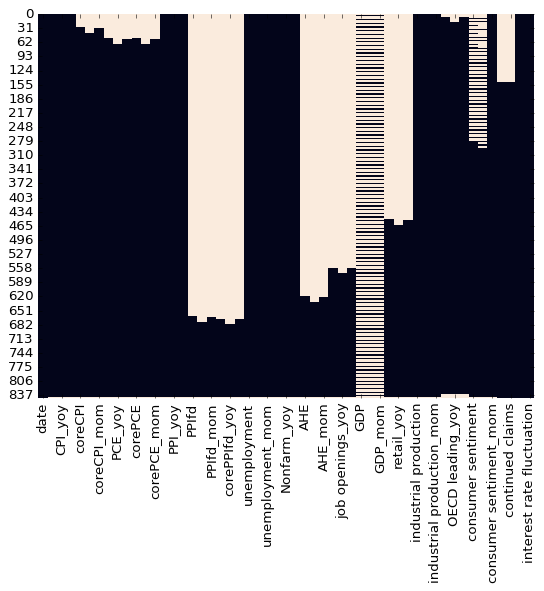

In [82]:
# msno.matrix(merged_df)
# plt.show()

sns.heatmap(merged_df.isna(),cbar=False)

try :
    os.makedirs('images')
    plt.savefig('images/missing_values.png')
except : 
    plt.savefig('images/missing_values.png')

In [159]:
# 결측률 
# merged_df['initial claims'].isna().sum()/ merged_df['date'].count()

# nullRate_dic = {}

# for key in merged_df.keys():
#     null_rate = merged_df[key].isna().sum()/merged_df['date'].count()
#     if null_rate > 0 :
#         nullRate_dic[key]=null_rate

IQR_dic = {}

# nullRate_tuple = sorted(nullRate_dic.items(),key=lambda x:x[1],reverse=True)
# nullRate_df = pd.DataFrame(list(nullRate_tuple), columns=['name','value'])
# nullRate_df['value'].describe()

IQR_dic['q1'] = merged_df.count().describe()['25%']
IQR_dic['q2'] = merged_df.count().describe()['50%']
IQR_dic['q3'] = merged_df.count().describe()['75%']
IQR_dic['q4'] = merged_df.count().describe()['max']
IQR_dic

{'q1': 284.0, 'q2': 788.0, 'q3': 842.0, 'q4': 843.0}

In [160]:
# IQR(사분범위)로 열 제거 => 나머지 결측치 행 제거
merged_df.count()['CPI']
imputed_df_dic = {}


for z in IQR_dic.items() :
    imputed_df = merged_df.copy()
    for key in imputed_df.keys():
        if imputed_df.count()[key] < z[1]:
            imputed_df.drop(key, axis=1, inplace=True)
    imputed_df.dropna(axis=0, inplace=True)
    imputed_df_dic[z[0]] = imputed_df


for z in imputed_df_dic.items():
    z[1].to_csv(f'dataframes/imputed_df_{z[0]}.csv', index=False)


### 이상치 처리 ( Outlier ) 

### 상관관계 분석 ( Correlation Analysis )
- 각 컬럼 간의 상관관계를 시각화하여 분석한다.
- 정답인 Interest rate와의 상관관계가 가장 중요하다.
- 이외에 컬럼 간의 상관관계에 따라 다중공선성 처리를 고려한다.

In [161]:
# 결측치 처리 데이터 로드

imputed_df_dic['q1'] = pd.read_csv('dataframes/imputed_df_q1.csv')
imputed_df_dic['q2'] = pd.read_csv('dataframes/imputed_df_q2.csv')
imputed_df_dic['q3'] = pd.read_csv('dataframes/imputed_df_q3.csv')
imputed_df_dic['q4'] = pd.read_csv('dataframes/imputed_df_q4.csv')

for z in imputed_df_dic.items():
    print(f'{z[0]} : {len(z[1].keys())} 개의 열 , {z[1].date.count()} 개의 행')
    

q1 : 40 개의 열 , 277 개의 행
q2 : 27 개의 열 , 781 개의 행
q3 : 19 개의 열 , 841 개의 행
q4 : 2 개의 열 , 843 개의 행


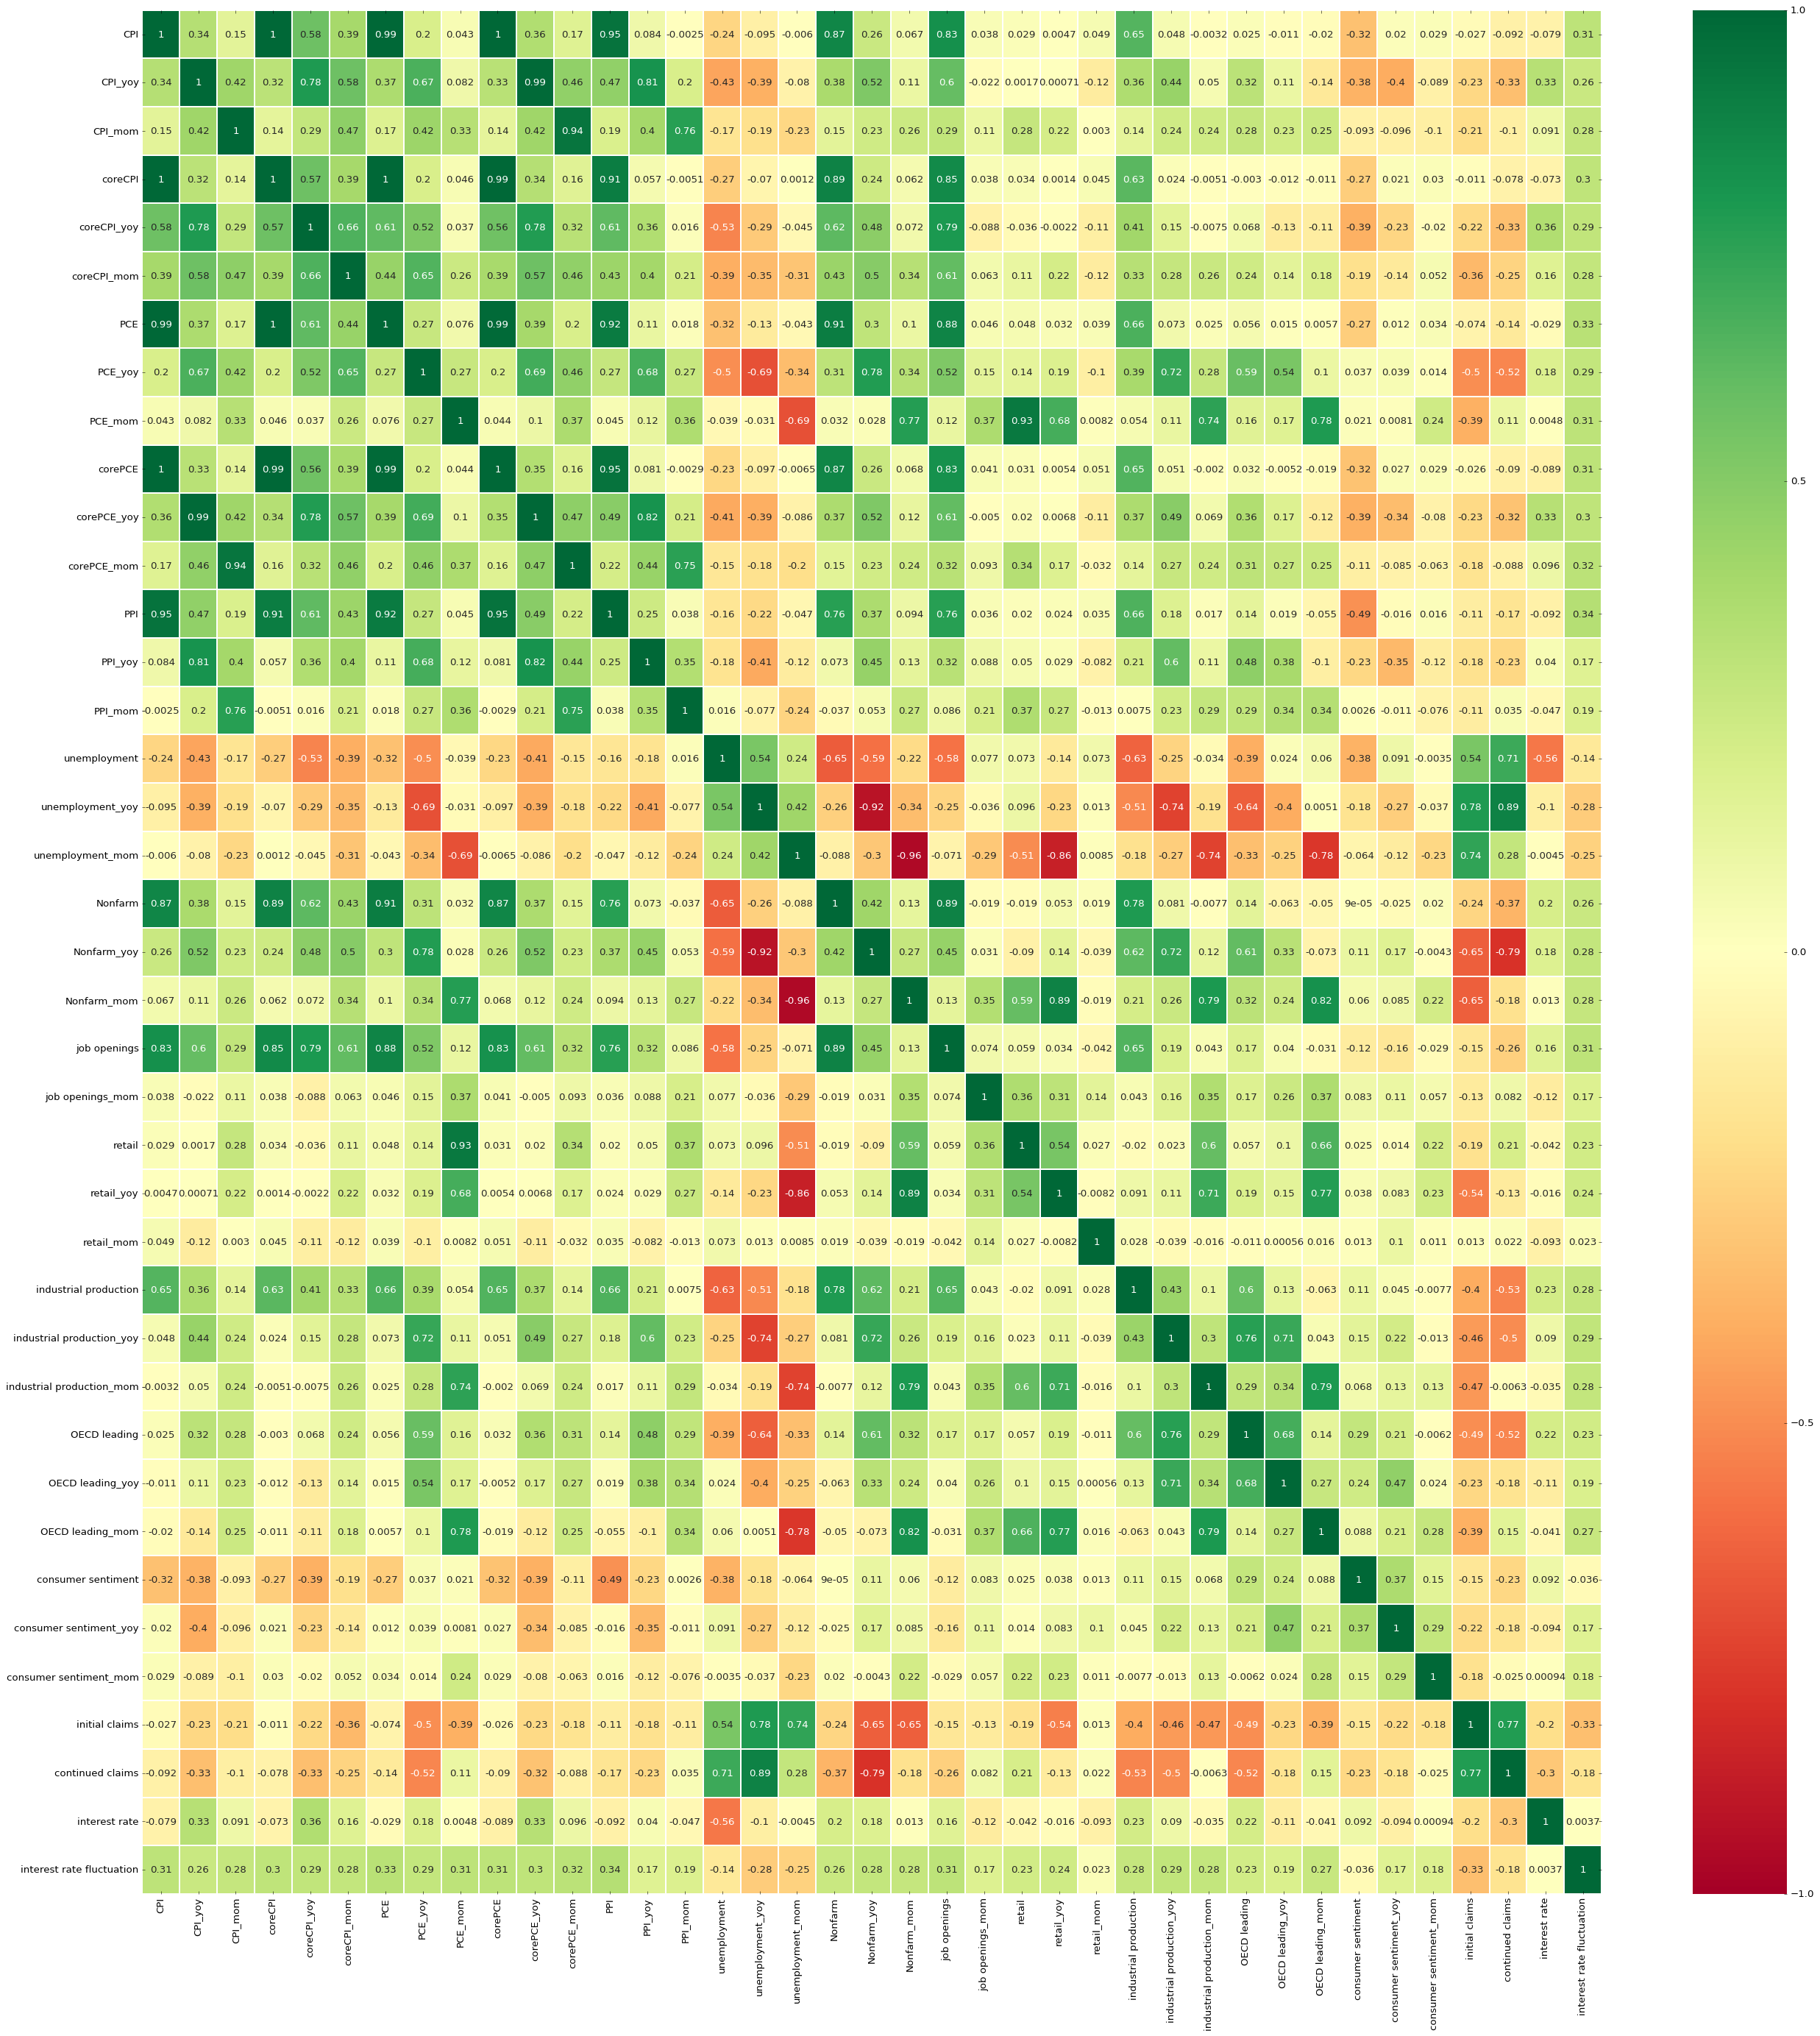

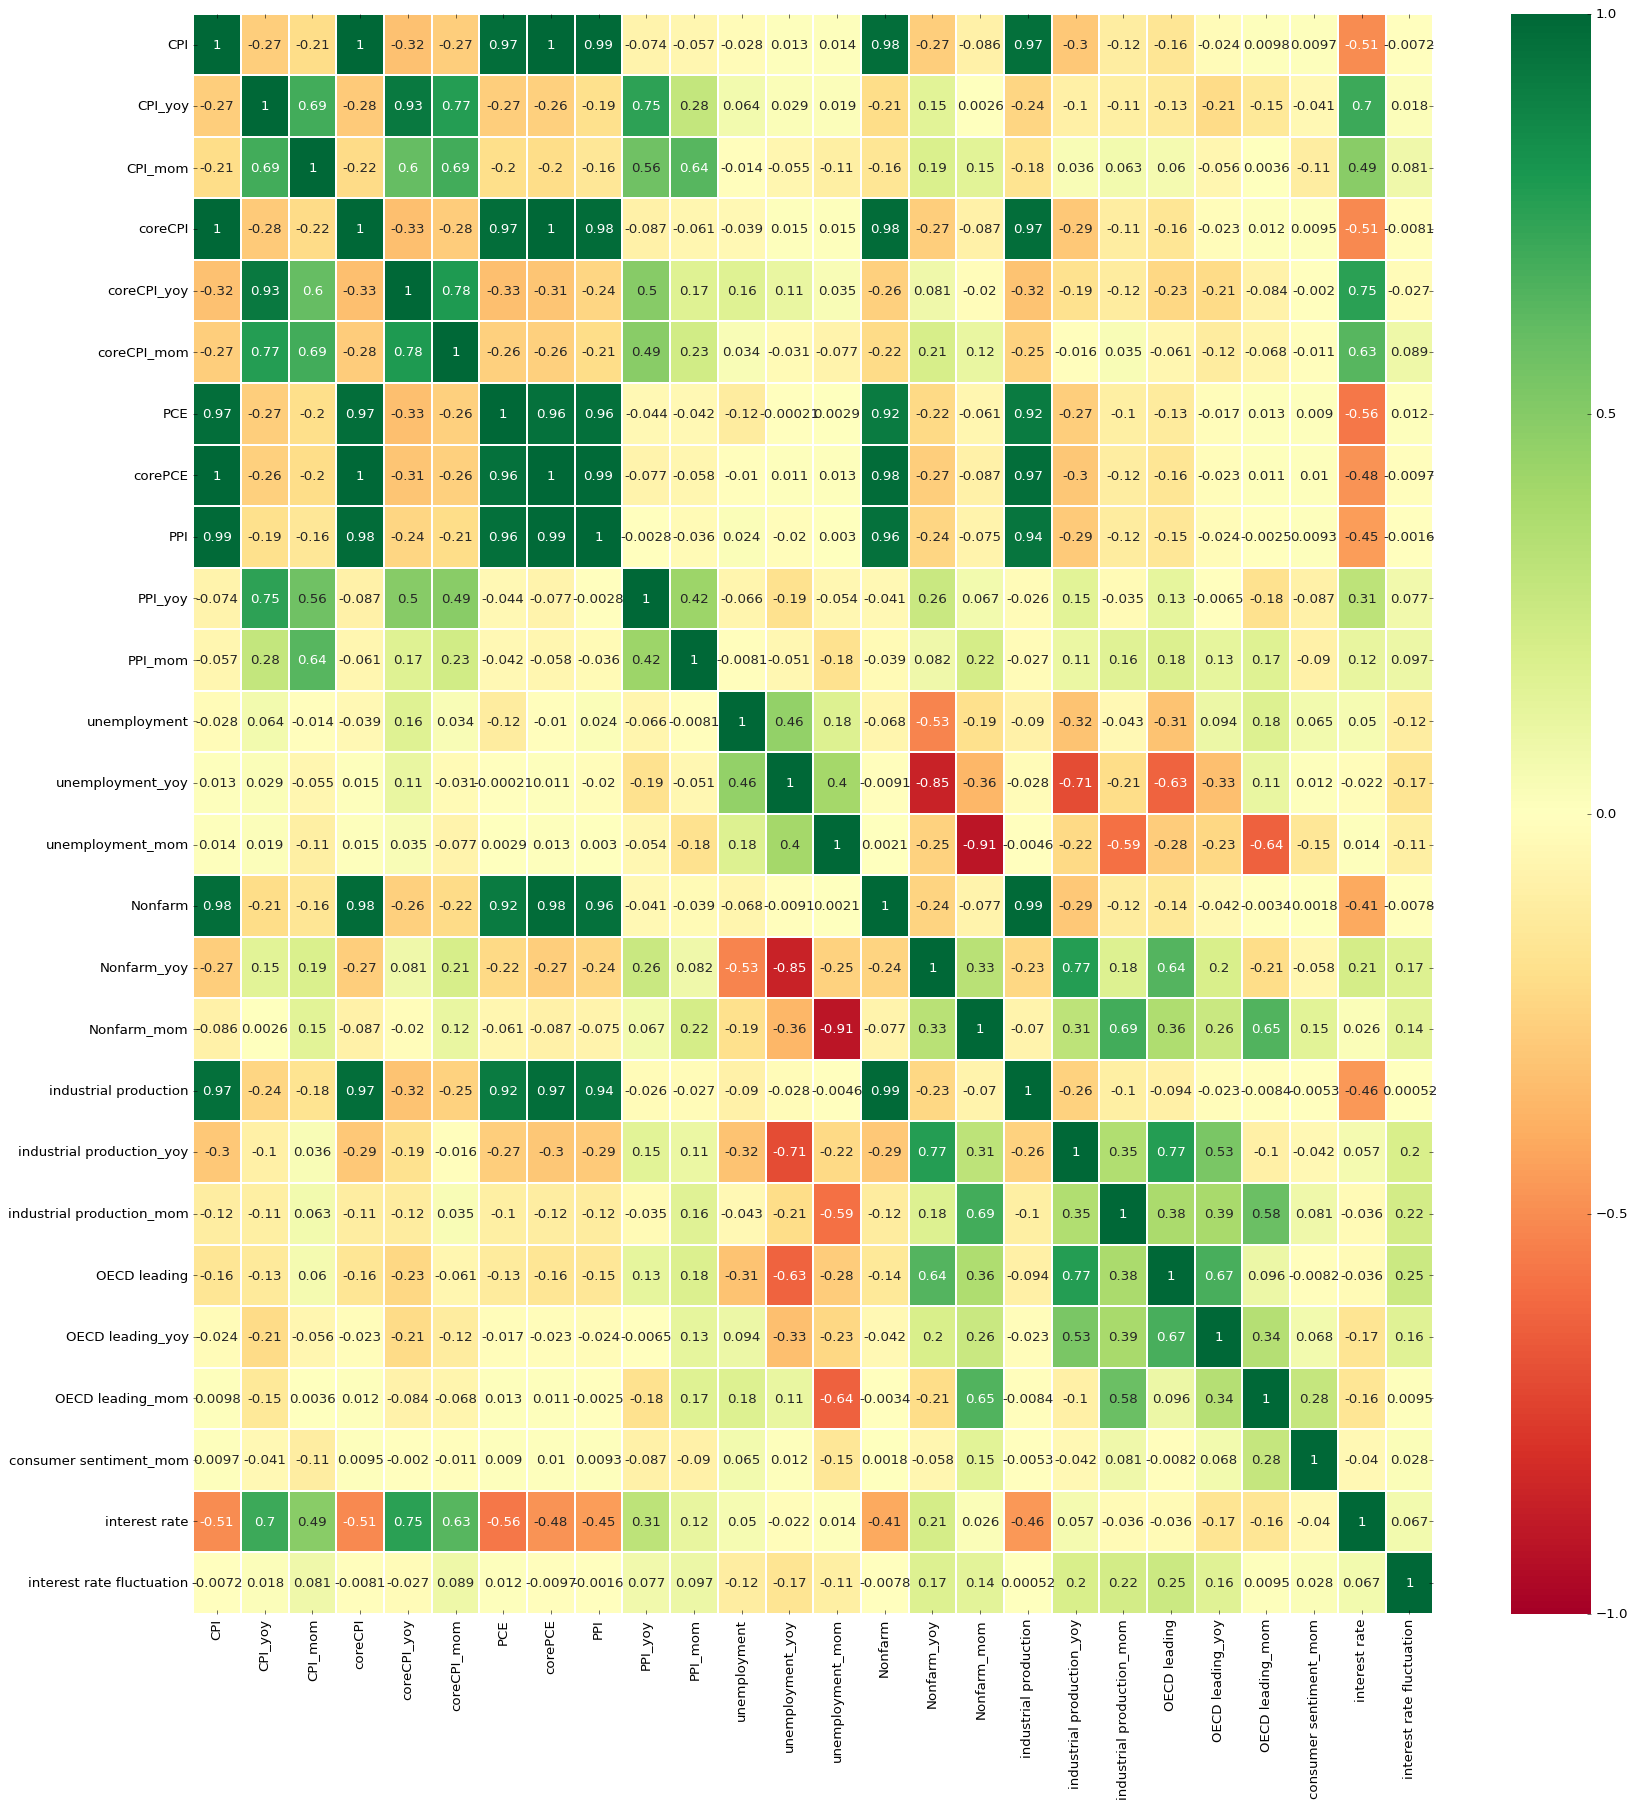

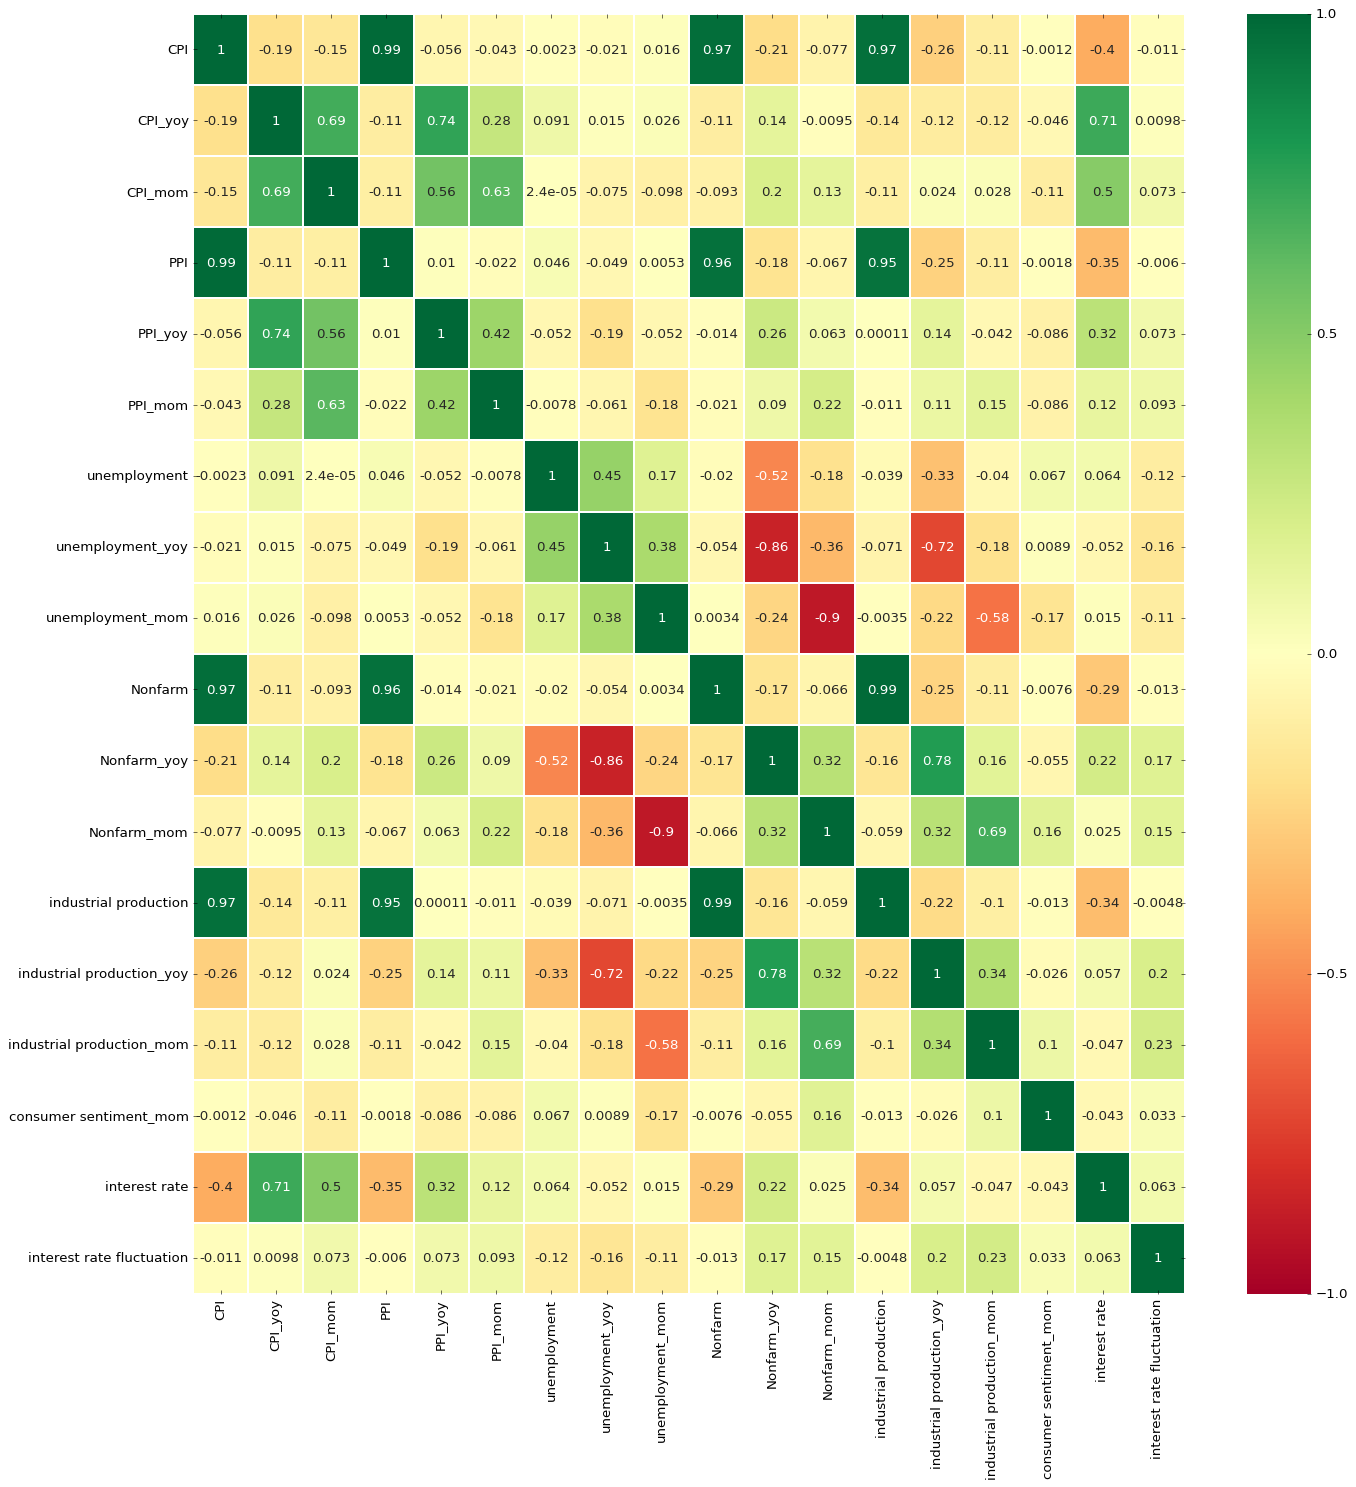

In [202]:
size_dic = {'q1':40, 'q2':25, 'q3':20}

for t in size_dic.items():
    corr_df = imputed_df_dic[t[0]].drop('date',axis=1)
    fig, ax = plt.subplots(figsize=(t[1],t[1])) 
    sns.heatmap(corr_df.corr(),vmin=-1,vmax=1,annot=True,linewidths=0.2,cmap='RdYlGn', ax=ax)
    plt.savefig(f'images/correlation_{t[0]}.png')

In [203]:
Corr_df = imputed_df_dic['q1'].drop('date',axis=1)
abs(corr_df.corr()['interest rate fluctuation'])

CPI                          0.011109
CPI_yoy                      0.009828
CPI_mom                      0.073032
PPI                          0.006048
PPI_yoy                      0.073045
PPI_mom                      0.093298
unemployment                 0.116980
unemployment_yoy             0.159392
unemployment_mom             0.111193
Nonfarm                      0.012569
Nonfarm_yoy                  0.169166
Nonfarm_mom                  0.153241
industrial production        0.004768
industrial production_yoy    0.202037
industrial production_mom    0.225675
consumer sentiment_mom       0.033387
interest rate                0.063046
interest rate fluctuation    1.000000
Name: interest rate fluctuation, dtype: float64

#### 금리 변동을 어느 행에 포함할지 고려함
- 예 : 2000년 3월 금리 - 2000년 4월 금리의 차이
- 금리 차를 3월에 넣을 때보다 4월에 넣을 때 상관계수가 올라감 
- 두 금리의 차를 다음 행에 포함하기로 결정

In [162]:
sdf = shifted_df.copy()
for key in sdf.keys():
    if sdf.count()[key] < 841:
        sdf.drop(key, axis=1, inplace=True)
sdf.dropna(axis=0, inplace=True)

try : 
    sdf.drop('date',axis=1,inplace=True)
except :
    pass 
abs(sdf.corr()['interest rate fluctuation'])

CPI                          0.012605
CPI_yoy                      0.005871
CPI_mom                      0.030761
PPI                          0.008565
PPI_yoy                      0.056850
PPI_mom                      0.108234
unemployment                 0.083441
unemployment_yoy             0.115869
unemployment_mom             0.091161
Nonfarm                      0.016046
Nonfarm_yoy                  0.129467
Nonfarm_mom                  0.103490
industrial production        0.009847
industrial production_yoy    0.151681
industrial production_mom    0.195280
consumer sentiment_mom       0.107679
interest rate                0.072698
interest rate fluctuation    1.000000
Name: interest rate fluctuation, dtype: float64

In [167]:
abs(corr_df.corr()['interest rate fluctuation']).sum(), abs(sdf.corr()['interest rate fluctuation']).sum()

(2.5178161136973474, 2.2995447133770175)

### Feature Selection : 상관 관계가 낮은 컬럼 제거 